<a href="https://colab.research.google.com/github/SravanthiS7/fmml-lab-1/blob/main/FMML_Module_9_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Kushagra Agarwal

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

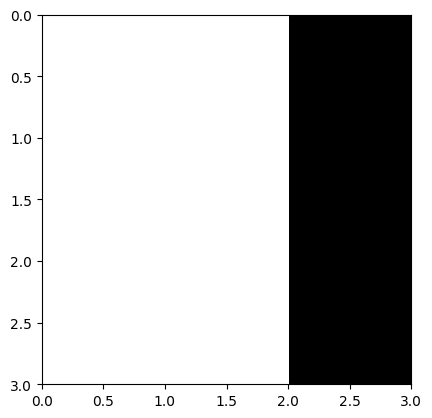

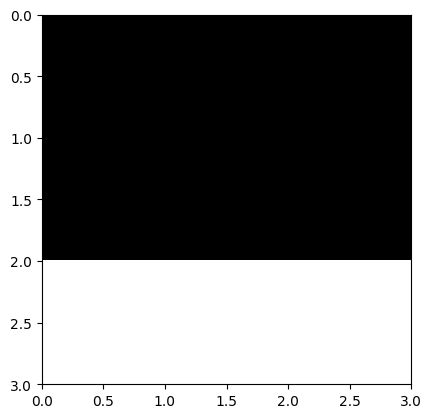

In [ ]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [ ]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [ ]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [ ]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [ ]:
import cv2
import numpy as np
import torch

def apply_conv(image, kernel, padding=0, stride=1):
    if image is None:
        raise ValueError("Failed to read the image file")

    # --------IMAGE PREPROCESSING-------
    image = torch.from_numpy(image)
    # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
    input = image.view((1,1,image.shape[0], image.shape[1]))

    # Convolution operation using Pytorch
    conv = torch.nn.Conv2d(1,1, kernel_size=3, stride=stride, padding=padding, bias=False)
    conv.weight.data = torch.from_numpy(kernel).float().view(1,1,3,3)
    out = conv(input)

    # Return the result as a NumPy array
    return out[0,0,:,:].numpy()

try:
    # Load the image
    image = cv2.imread('/content/grid1 (1).jpg', 0)

    # Define the filters
    filter1 = np.array([[-1,-1,-1],
                        [ 0, 0, 0],
                        [ 1, 1, 1]])

    filter2 = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])

    # Apply the convolution with different filters
    out1 = apply_conv(image, filter1, padding=0, stride=1)
    out2 = apply_conv(image, filter2, padding=0, stride=1)

    # Display the results (you may need to convert the output to uint8)
    cv2.imshow("Filtered Image 1", out1.astype(np.uint8))
    cv2.imshow("Filtered Image 2", out2.astype(np.uint8))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

except Exception as e:
    print("An error occurred:", e)


An error occurred: Failed to read the image file


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/grid1 (1).jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Failed to load the image")
else:
    # Convert the image to a float array
    image = image.astype(float) / 255.0

    # Define the filters and apply convolution
    # (Assuming `out1` and `out2` are already computed)

    # Display the images
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1,3,1)
    ax.imshow(image, cmap='gray')
    ax.set_title('Original Image')
    ax = fig.add_subplot(1,3,2)
    ax.imshow(out1, cmap='gray')
    ax.set_title('Horizontal edge')
    ax = fig.add_subplot(1,3,3)
    ax.imshow(out2, cmap='gray')
    ax.set_title('Vertical edge')
    plt.show()




Failed to load the image


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [ ]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:22<00:00, 7443583.56it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [ ]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [ ]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [ ]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [ ]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [ ]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/5, Loss: 0.0129, Accuracy: 39.6200
Epoch 2/5, Loss: 0.0092, Accuracy: 57.9280
Epoch 3/5, Loss: 0.0077, Accuracy: 65.0060
Epoch 4/5, Loss: 0.0066, Accuracy: 70.2880
Epoch 5/5, Loss: 0.0057, Accuracy: 74.4080


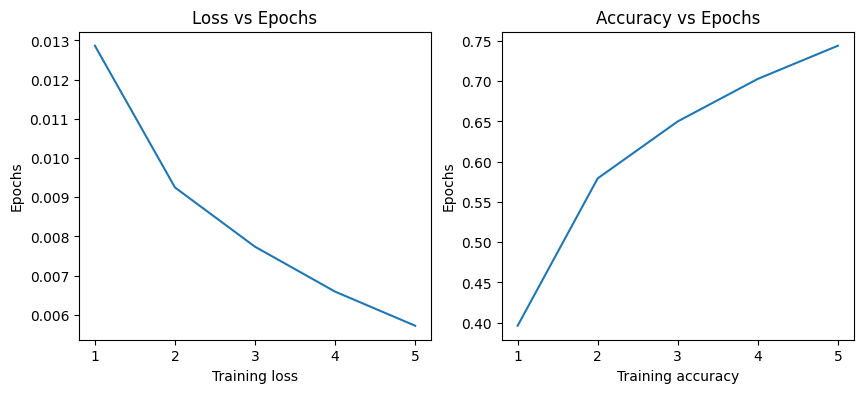

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [ ]:
# Accuracy on test data after training
test_model(model, testloader)

Accuracy of the network: 68 %


## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?


#*1st question answer*

Here's why CNNs are generally better than ANNs for image classification tasks:

* **Spatial awareness:** CNNs are designed to understand the spatial relationships between pixels in an image. They can automatically detect edges, textures, and other features that are crucial for recognizing objects. ANNs, on the other hand, treat each pixel independently, making them less effective for tasks that require understanding the bigger picture.

* **Efficiency:**  Unfolding an image into a single vector for an ANN leads to a massive number of trainable parameters, especially for high-resolution images. This can be computationally expensive and time-consuming to train. CNNs use filters and shared weights, significantly reducing the number of parameters needed and making the training process more efficient.

* **Feature extraction:** A CNN can automatically learn the important features from the data during training. This eliminates the need for manual feature engineering, which can be a complex and time-consuming process for ANNs.

* **Scalability:** CNNs excel at handling large datasets of images, making them ideal for real-world applications where vast amounts of training data are available. ANNs, on the other hand, can struggle with large datasets due to the computational cost of training with so many parameters.

In summary, CNNs are specifically designed to work with image data, taking advantage of the spatial relationships between pixels. This allows them to achieve higher accuracy and efficiency compared to ANNs in image classification tasks.

#*2ND QUESTION ANSWER*

Unfortunately, I can't directly access and modify CNN models to run experiments. However, I can guide you through the process of tuning hyperparameters to potentially improve test accuracy on your CNN for image classification.

Here's a roadmap:

1. **Identify Baseline Performance:**  Run your current CNN model and record the test accuracy. This will be your baseline for comparison.

2. **Hyperparameter Tuning Strategy:** There are various approaches to hyperparameter tuning. Here are two common methods:

    * **Grid Search:** This method involves systematically trying out different combinations of hyperparameter values within a defined range. It can be exhaustive but ensures you explore a wide range of possibilities.
    * **Random Search:** This method randomly samples hyperparameter values from a defined range. It can be more efficient for large search spaces and may avoid getting stuck in local optima.

3. **Key Hyperparameters to Focus on:** Here are some critical hyperparameters to consider tuning:

    * **Learning Rate (LR):** This controls how much the model weights are updated during training. A very high LR can cause the model to diverge, while a very low LR can lead to slow learning.
    * **Epochs:** This refers to the number of times the entire training dataset is passed through the network. Too few epochs might lead to underfitting, while too many can lead to overfitting.
    * **Optimizer:**  This algorithm dictates how the model updates its weights based on the learning rate and the loss function. Popular optimizers for CNNs include Adam, RMSprop, and SGD with momentum.

4. **Evaluation and Monitoring:**  For each hyperparameter combination, train the model and record the test accuracy. Track the training and validation loss during training to monitor for overfitting.

5. **Improved Test Accuracy:**  Once you've explored different hyperparameter combinations, identify the one that results in the highest test accuracy. This will be your improved performance compared to the baseline.

**Additional Tips:**

* **Data Augmentation:**  Artificially expanding your dataset through techniques like flipping, cropping, and adding noise can help improve model generalization and potentially lead to better performance.
* **Early Stopping:** Implement early stopping to prevent overfitting. This technique monitors the validation loss and stops training if it starts to increase after a certain number of epochs.

By following these steps and experimenting with different hyperparameter combinations, you can potentially improve the test accuracy of your CNN for image classification. Remember, the optimal hyperparameters will depend on your specific dataset and model architecture.


#*3RD QUESTION ANSWER*

Reducing the number of convolution layers to just one in a CNN for image classification will likely have several consequences, both positive and negative:

**Negative Impacts:**

* **Reduced Feature Extraction Capability:** Convolution layers are the workhorses of CNNs for image classification. They extract features from the image at different scales and orientations. With only one layer, the model's ability to learn complex and nuanced features will be significantly limited. This can lead to:
    * **Lower Accuracy:** The model might struggle to accurately classify images, especially for complex datasets.
    * **Poor Generalization:** The model might not generalize well to unseen data, performing poorly on images with variations not encountered during training.

* **Loss of Spatial Information:**  Multiple convolution layers with varying filter sizes help capture spatial information from the image at different levels of detail. A single layer might not be able to effectively capture these spatial relationships, leading to a less robust understanding of the image content.

**Positive Impacts:**

* **Reduced Model Complexity:** Having just one convolution layer significantly reduces the number of trainable parameters in the model. This can be beneficial for:
    * **Faster Training:** Less parameters translate to faster training times, especially on resource-constrained environments.
    * **Lower Memory Footprint:** Smaller models require less memory to store and run, making them suitable for deployment on devices with limited memory.

* **Potential for Efficiency Gains:** In some specific scenarios, a simple CNN with one convolution layer might achieve surprisingly good accuracy, especially for tasks with less complex image data. This can be an advantage for real-time applications where speed and efficiency are crucial.

**Overall:**

Reducing the number of convolution layers to one is a significant simplification of a CNN architecture. While it offers benefits in terms of model size and training speed, it comes at the cost of reduced feature extraction capability and potentially lower accuracy. This approach might be suitable for very specific use cases with limited computational resources and well-defined, simple image data. However, for most image classification tasks, using a CNN with multiple convolution layers will provide superior performance and generalization.


#*4TH QUESTION ANSWER*

You're right, Softmax is actually commonly used in the last layer of a CNN for image classification tasks! It plays a vital role in the output predictions. Here's why:

**Softmax Activation in CNN Output Layer:**

* **Probability Distribution:** Softmax takes the output values from the last convolution layer (often passed through a fully connected layer) and transforms them into a probability distribution across all possible classes. Each element in the output vector represents the probability of the input image belonging to a specific class.

* **Class Scores vs. Probabilities:**  Without Softmax, the final layer's outputs might simply be a set of scores, indicating which class has the highest value. Softmax converts these scores into actual probabilities between 0 and 1, where the sum of all probabilities for all classes equals 1.

* **Decision Making:**  By having probabilities, the model can make a more informed decision about the image classification. For instance, if the highest probability is 0.8 for "cat" and all other classes are below 0.1, the model is confident in predicting "cat."

**Alternatives (Less Common):**

In some rare cases, depending on the specific task, alternatives to Softmax might be used in the last layer:

* **Sigmoid:** This can be used for binary classification (two class problems) where the output represents the probability of belonging to one class (e.g., cat vs not-cat). However, Sigmoid suffers from vanishing gradients in deeper networks, making it less favorable for multi-class problems.
* **Linear Activation:** This might be used for regression tasks where the output is a continuous value rather than a class label.

**In conclusion, Softmax is the preferred activation function in the last layer of a CNN for image classification because it provides a probabilistic interpretation of the model's output, enabling more informed decision making.**
